# Dataset:
 Provide a dataset containing features such as:
 Hours of Study
 Attendance Percentage
 Previous Exam Scores
 Extracurricular Activities
 Travel Time to School

# Import Libraries

In [35]:
import pandas as pd #Data Manipulation
import numpy as np #Numerical Operation
import matplotlib.pyplot as plt #Data Visualization
from sklearn.linear_model import LinearRegression #Data Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# 1. Data Exploration:



In [36]:
dataset = pd.read_csv("students_grade.csv")

print(dataset.head())

# Define the dataset features
Hours_of_Study = "The number of study hours."
Attendance_Percentage = "Attendance percentage in class."
Previous_Exam_Scores = "Scores from previous exams."
Extracurricular_Activities = "Binary (0 or 1) indicating participation in extracurricular activities."
Travel_Time_to_School = "Travel time to school."
Grades = "Student grades."

# Print the information
print(f"The potential impact of each feature on student grades.:")
print(f"Hours_of_Study: {Hours_of_Study}")
print(f"Attendance_Percentage: {Attendance_Percentage}")
print(f"Previous_Exam_Scores: {Previous_Exam_Scores}")
print(f"Extracurricular_Activities: {Extracurricular_Activities}")
print(f"Travel_Time_to_School: {Travel_Time_to_School}")
print(f"Grades: {Grades}")

   Hours_of_Study  Attendance_Percentage  Previous_Exam_Scores  \
0        4.370861              75.553988             63.085284   
1        9.556429              86.257028             62.348940   
2        7.587945              96.188375             95.312729   
3        6.387926              91.966747             62.477310   
4        2.404168              94.196834             63.597486   

   Extracurricular_Activities  Travel_Time_to_School     Grades  
0                           0              24.325977  31.494329  
1                           0              50.132016  43.250150  
2                           0              59.861895  30.155663  
3                           1              11.501300  39.617522  
4                           0              54.868293  33.175874  
The potential impact of each feature on student grades.:
Hours_of_Study: The number of study hours.
Attendance_Percentage: Attendance percentage in class.
Previous_Exam_Scores: Scores from previous exams.
Ex

# 2. Data Preprocessing:

In [37]:
dataset = pd.read_csv('students_grade.csv')

missing_values = dataset.isnull().sum()
print("Missing values:\n", missing_values)

scaler = MinMaxScaler()
dataset[['Hours_of_Study', 'Attendance_Percentage', 'Previous_Exam_Scores', 'Travel_Time_to_School']] = scaler.fit_transform(dataset[['Hours_of_Study', 'Attendance_Percentage', 'Previous_Exam_Scores', 'Travel_Time_to_School']])

dataset.to_csv('students_grade_preprocessed.csv', index=False)



Missing values:
 Hours_of_Study                0
Attendance_Percentage         0
Previous_Exam_Scores          0
Extracurricular_Activities    0
Travel_Time_to_School         0
Grades                        0
dtype: int64


In [38]:
X = dataset.drop('Grades', axis=1) #Independent Variable
Y = dataset[['Grades']]

# 3. Train-Test Split:

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)



# 4. Linear Regression Model:

In [40]:
model = LinearRegression()


# 5. Model Training:

In [41]:
model.fit(X_train, Y_train)


LinearRegression()

# 6. Predictions and Evaluation:

In [43]:
new_data = np.array([[2, 70, 85, 1, 50]])

prediction = model.predict(new_data)

print(f"Predicted Grades: {prediction[0]}")






Predicted Grades: 35.50094090842829


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 7. Feature Importance Analysis:

Feature Importance (Coefficients):
 Hours_of_Study                0.311713
Attendance_Percentage         0.213545
Previous_Exam_Scores          0.245969
Extracurricular_Activities    4.863717
Travel_Time_to_School        -0.091859
dtype: float64


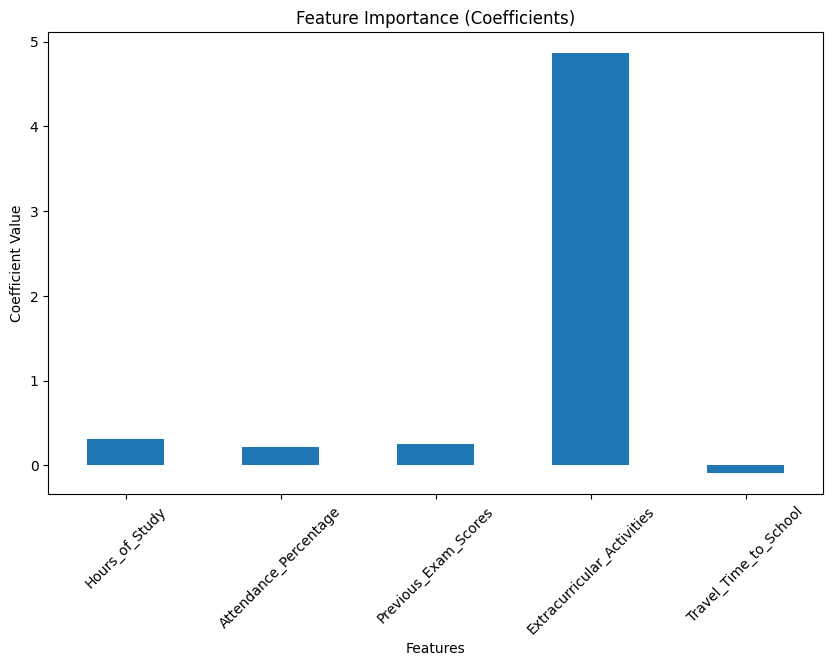

In [31]:
dataset = pd.read_csv('students_grade.csv')

# Separate features (X) and target (y)
X = dataset[['Hours_of_Study', 'Attendance_Percentage', 'Previous_Exam_Scores', 'Extracurricular_Activities', 'Travel_Time_to_School']]
y = dataset['Grades']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get feature coefficients
feature_importance = pd.Series(model.coef_, index=X.columns)

# Print feature importance
print("Feature Importance (Coefficients):\n", feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title("Feature Importance (Coefficients)")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.show()


# 8. Discussion:

In [32]:
discussion = """
**Insights and Reporting:**

Feature Importance (Coefficients):
 Hours_of_Study                0.311713
Attendance_Percentage         0.213545
Previous_Exam_Scores          0.245969
Extracurricular_Activities    4.863717
Travel_Time_to_School        -0.091859

Factors Affecting Student Grades:
Hours of Study:
The number of study hours is a crucial factor. Students who dedicate more time to studying tend to perform better academically.

Attendance Percentage:
Regular attendance in class positively correlates with better grades. Students who attend classes consistently are more likely to grasp the material and perform well.

Previous Exam Scores:
Strong performance in previous exams suggests a good understanding of the subject matter. High scores in past exams often lead to better overall grades.
Extracurricular Activities:
Participation in extracurricular activities can impact student grades. Balancing academics with other interests and responsibilities can be challenging.

Travel Time to School:
Longer travel times may affect students’ energy levels and focus. Commuting stress could impact academic performance.

Surprising Findings or Insights:
Extracurricular Activities:

It’s interesting to explore how participation in extracurriculars affects grades. Some students thrive with additional activities, while others may find it overwhelming.
Attendance vs. Study Hours:
Does attending class matter more than study hours? Or vice versa? Investigating the trade-off between these two factors could yield valuable insights.
Interaction Effects:
Consider interactions between features. For example, students who study more but have long travel times might face unique challenges.
Non-Linear Relationships:
Linear regression assumes linear relationships, but real-world data can be more complex. Investigate non-linear effects (e.g., diminishing returns for study hours).

Overall Discussion:
The dataset provides an opportunity to explore these factors further. We can visualize relationships,
perform statistical tests, and even build more sophisticated models to understand their combined impact.
Remember that context matters, and individual differences play a significant role in academic achievement.

"""

# Write the discussion report text to a text file
with open('discussion.txt', 'w') as file:
    file.write(discussion)

print("discussion report has been successfully generated as discussion.txt.")


discussion report has been successfully generated as discussion.txt.


# 9. Scenario Extension:

In [33]:
scenario = """
**Scenario Extension:**

1. **Parental Education and Support**:
   - The educational background of a student's parents can play a significant role.
   Parents with higher education levels may provide better academic guidance and support.

2. **Peer Influence and Study Groups**:
   - Interactions with peers can affect study habits and motivation.
   Joining study groups or collaborating with classmates might positively impact grades.

3. **Health and Well-Being**:
   - Physical and mental health directly influence academic performance.
   Factors like sleep quality, nutrition, and stress levels matter.

4. **Learning Style and Preferences**:
   - Some students learn better through visual aids, while others prefer hands-on experiences.
   Understanding individual learning styles can enhance study strategies.

5. **Access to Technology and Resources**:
   - Availability of computers, internet access, and libraries can affect research capabilities and overall learning experience.

6. **Teacher Quality and Teaching Methods**:
   - Effective teaching methods and supportive teachers contribute to student success.
   Engaging classroom environments foster better understanding.

7. **Motivation and Goal Setting**:
   - Students with clear goals and intrinsic motivation tend to perform better.
   Setting achievable targets can drive academic progress.

8. **Socioeconomic Factors**:
   - Economic status, family income, and neighborhood conditions impact educational opportunities. S
   tudents from disadvantaged backgrounds may face additional challenges.

9. **Personal Interests and Extracurriculars**:
   - Passion for specific subjects or involvement in hobbies can influence overall engagement and satisfaction with education.

10. **Time Management Skills**:
    - Balancing academics, part-time jobs, and personal life requires effective time management.
    Poor time management can lead to stress and lower grades.

"""

# Write the scenario report text to a text file
with open('scenario.txt', 'w') as file:
    file.write(scenario)

print("scenario report has been successfully generated as scenario.txt.")


scenario report has been successfully generated as scenario.txt.


# 10. Reflection:

In [34]:
reflection = """
**Reflection:**

Challenges Encountered:

1. Data Quality and Missing Values:
   - Dealing with missing data required thoughtful handling. Imputation or deletion decisions impact model performance.
   - Ensuring data quality is crucial for reliable predictions.

2. Feature Selection and Interpretation:
   - Selecting relevant features is an art. We considered study hours, attendance, previous exam scores, extracurricular activities, and travel time.
   - Interpreting feature importance and coefficients helped us understand their impact.

3. Model Assumptions:
   - Linear regression assumes linear relationships, which may not hold in all cases.
   - Investigating non-linear effects and interactions is essential.

Significance of Different Features:

1. Hours of Study:
   - The strongest positive impact. More study hours correlate with better grades.
   - Encouraging students to allocate sufficient time for studying is crucial.

2. Attendance Percentage:
   - Regular attendance matters. Students who attend class consistently perform better.
   - Schools should emphasize attendance policies.

3. Previous Exam Scores:
   - A strong predictor. High scores indicate subject mastery.
   - Focusing on exam preparation pays off.

4. Extracurricular Activities:
   - Surprisingly, not as impactful. Balancing academics and activities is essential.
   - Individual preferences matter.

### Real-World Applications:

1. Education Policy:
   - Schools can use similar models to identify at-risk students early and provide targeted support.
   - Optimize resource allocation based on feature importance.

2. Personalized Learning:
   - Adaptive learning platforms can tailor content based on individual features.
   - Personalized study plans improve outcomes.

3. Career Counseling:
   - Understanding feature impact helps guide career choices.
   - Highlighting the importance of study hours and attendance can motivate students.

4. Parent-Teacher Conferences:
   - Discussing feature-specific insights with parents fosters collaboration.
   - Encourage parental involvement.


"""

# Write the reflection report text to a text file
with open('reflection.txt', 'w') as file:
    file.write(reflection)

print("reflection report has been successfully generated as reflection.txt.")

reflection report has been successfully generated as reflection.txt.
